In [14]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
themes = get_themes()
set_nb_theme(themes[4])

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd as scipy_svd
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer



In [5]:
# we can confirm this with code
A = np.array([[1, 0.3], [0.45, 1.2]])
U, S, V = scipy_svd(A)
print('singular values:', S)

# the toy 2d matrix
x = np.array([[-10, -10, 20, 20], [-10, 20, 20, -10]]).T
x

singular values: [1.49065822 0.71444949]


array([[-10, -10],
       [-10,  20],
       [ 20,  20],
       [ 20, -10]])

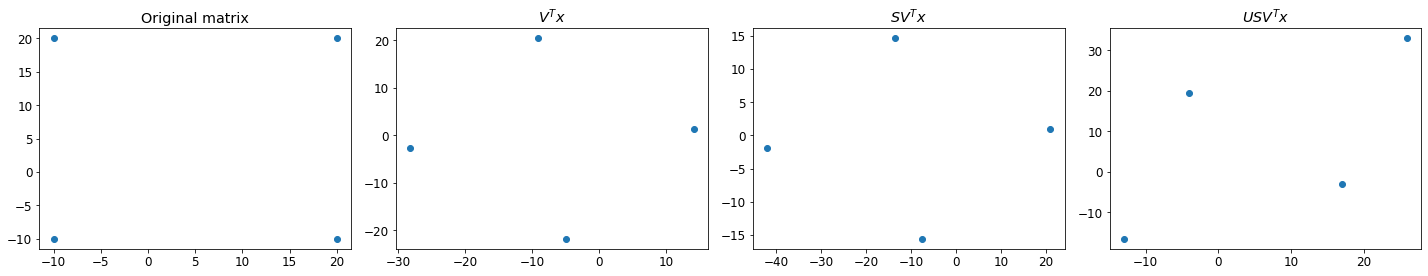

In [6]:
# change default font size
plt.rcParams['font.size'] = 12 

# the plot is not as pretty as the diagram above,
# but hopefully it gets the point across
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

ax[0].scatter(x[:, 0], x[:, 1])
ax[0].set_title('Original matrix')

temp = x @ V.T
ax[1].scatter(temp[:, 0], temp[:, 1])
ax[1].set_title('$V^Tx$')

temp = temp @ np.diag(S)
ax[2].scatter(temp[:, 0], temp[:, 1])
ax[2].set_title('$SV^Tx$')

temp = temp @ U
ax[3].scatter(temp[:, 0], temp[:, 1])
ax[3].set_title('$USV^Tx$')

plt.tight_layout()
plt.show()


In [7]:
example = [
    'Machine learning is super fun',
    'Python is super, super cool',
    'Statistics is cool, too',
    'Data science is fun',
    'Python is great for machine learning',
    'I like football',
    'Football is great to watch']

# a two-staged model pipeline,
# first convert raw words to a tfidf document-term matrix
# and apply svd decomposition after that
tfidf = TfidfVectorizer(stop_words = 'english')

In [8]:
svd = TruncatedSVD(n_components = 2)
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('svd', svd)
])
X_lsa = pipeline.fit_transform(example)
X_lsa

array([[ 0.82714832, -0.20216821],
       [ 0.64317518, -0.27989764],
       [ 0.19952711, -0.19724375],
       [ 0.24907097, -0.13828783],
       [ 0.7392593 ,  0.14892526],
       [ 0.1162772 ,  0.73645697],
       [ 0.28427388,  0.79260792]])

In [9]:
# mapping of words to latent factors/concepts,
# i.e. each concept is a linear combination of words
tfidf = pipeline.named_steps['tfidf']
vocab = tfidf.get_feature_names()
pd.DataFrame(svd.components_, index = ['concept1', 'concept2'], columns = vocab)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
concept1,0.211903,0.082524,0.123490,0.293206,0.283966,0.425531,0.048611,0.425531,0.343490,0.082524,0.083414,0.510029,0.100157
concept2,-0.175362,-0.061554,0.654756,-0.124878,0.365768,-0.019431,0.413619,-0.019431,-0.029054,-0.061554,-0.110779,-0.240595,0.375162


In [10]:
svd = pipeline.named_steps['svd']
print('total variance explained:', np.sum(svd.explained_variance_))

# mapping of document to latent factors/concepts,
# i.e. Eech document is a linear combination of the concepts
pd.DataFrame(X_lsa, index = example, columns = ['concept1', 'concept2'])

total variance explained: 0.25260688696312783


,concept1,concept2
Machine learning is super fun,0.827148,-0.202168
"Python is super, super cool",0.643175,-0.279898
"Statistics is cool, too",0.199527,-0.197244
Data science is fun,0.249071,-0.138288
Python is great for machine learning,0.739259,0.148925
I like football,0.116277,0.736457
Football is great to watch,0.284274,0.792608


In [11]:
X_normed = normalize(X_lsa, axis = 1)
similarity = X_normed @ X_normed.T
pd.DataFrame(similarity, index = example, columns = example)

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000,0.985458,0.857746,0.964535,0.905386,-0.083026,0.104459
"Python is super, super cool",0.985458,1.000000,0.932623,0.995359,0.820075,-0.251150,-0.066049
"Statistics is cool, too",0.857746,0.932623,1.000000,0.963019,0.558322,-0.583514,-0.421662
Data science is fun,0.964535,0.995359,0.963019,1.000000,0.761204,-0.343126,-0.161758
Python is great for machine learning,0.905386,0.820075,0.558322,0.761204,1.000000,0.347952,0.516841
I like football,-0.083026,-0.251150,-0.583514,-0.343126,0.347952,1.000000,0.982423
Football is great to watch,0.104459,-0.066049,-0.421662,-0.161758,0.516841,0.982423,1.000000
